In [14]:
import numpy as np
import cv2
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils
import matplotlib.pyplot as plt

In [2]:
######################################################################################################################################
def stack_multiple_images(images_array, sep_lines=False, scale=0.5):
    # Function for rescaling and stacking cv2 BGR images together.
    # array form: [row1,row2,...rowN], row = [element1, element2,...elementN]
        
    ##################################################################################################################
    # Resize images based on the shape of the first image:
    for i in range(len(images_array)):
        for j in range(len(images_array[i])):
            images_array[i][j] = cv2.resize(images_array[i][j], (images_array[0][0].shape[1], images_array[0][0].shape[0]))
    
    # Images Rescaling and Convert Gray-scale to BGR if needed:
    for i in range(len(images_array)):
        for j in range(len(images_array[i])):
            images_array[i][j] = cv2.resize(images_array[i][j], (0, 0), None, scale, scale)
            
            if (len(images_array[i][j].shape) == 2):
                images_array[i][j] = cv2.cvtColor(images_array[i][j], cv2.COLOR_GRAY2BGR)
                
            if (len(images_array[i][j].shape) == 3):
                if (images_array[i][j].shape[2] == 1):
                    images_array[i][j] = cv2.cvtColor(images_array[i][j], cv2.COLOR_GRAY2BGR)
    
    ##################################################################################################################
    # Let's equalize rows number of images:
    lens = [1]*len(images_array)
    
    for i in range(len(images_array)):
        lens[i] = len(images_array[i])
    
    # get max_len to add a blank image if necessary:
    max_len = np.max(lens)
    
    for i in range(len(images_array)):
        if (len(images_array[i]) < max_len):
            blank_image = np.ones((images_array[0][0].shape[0], images_array[0][0].shape[1] , 3),dtype=np.uint8)*150
        
            for j in range(max_len - len(images_array[i])):
                images_array[i].append(blank_image)
                
    ##############################################################################################################
    # Stacking images:
    for i in range(len(images_array)):
        for j in range(len(images_array[i])):
            if (j == 0):
                h_stack = images_array[i][j]
            if (j > 0):
                h_stack = np.hstack([h_stack, images_array[i][j]])
        
        if (i == 0):                          
            v_stack = h_stack
        if (i > 0):                          
            v_stack = np.vstack([v_stack, h_stack])
            
    ##############################################################################################################
    # Paint Separation Lines:
    if sep_lines:
        
        # Horizontal Lines:
        if (len(images_array) > 0):
            for i in range(len(images_array)-1):
                cv2.line(v_stack, (0, (i+1)*(v_stack.shape[0]//len(images_array))), 
                        (v_stack.shape[1], (i+1)*(v_stack.shape[0]//len(images_array))), (255, 0, 0), 2)
                
        # Vertical Lines:
        for i in range(max_len-1):
            cv2.line(v_stack, ((i+1)*(v_stack.shape[1]//max_len), 0), 
                     ((i+1)*(v_stack.shape[1]//max_len), v_stack.shape[0]), (255, 0, 0), 2)
            
                                 
    return v_stack

In [6]:
image = cv2.imread('ztest_media/cachorros.jpg')
image = cv2.resize(image, (300,300))

In [7]:
images_array = [[image, image, image], [image], [image, image]]
stack = stack_multiple_images(images_array, sep_lines=True, scale=0.5)

cv2.imshow('image', stack)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
images_array = [[image]]
stack = stack_multiple_images(images_array, sep_lines=True, scale=1)

cv2.imshow('image', stack)
cv2.waitKey(0)
cv2.destroyAllWindows()

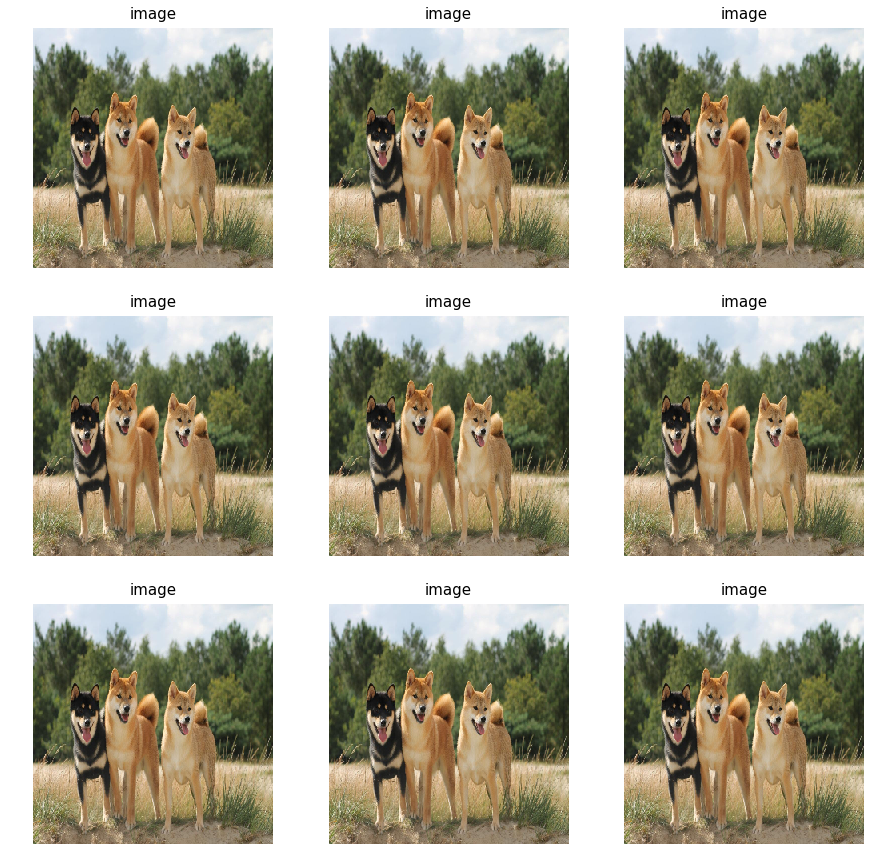

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
images_array = [[image, image, image], [image, image, image], [image, image, image]]
titles_array = [['image', 'image', 'image'], ['image', 'image', 'image'], ['image', 'image', 'image']]
OpCV_Utils.show_multiple_images_plt(images_array, titles_array, fig_size = (15,15))

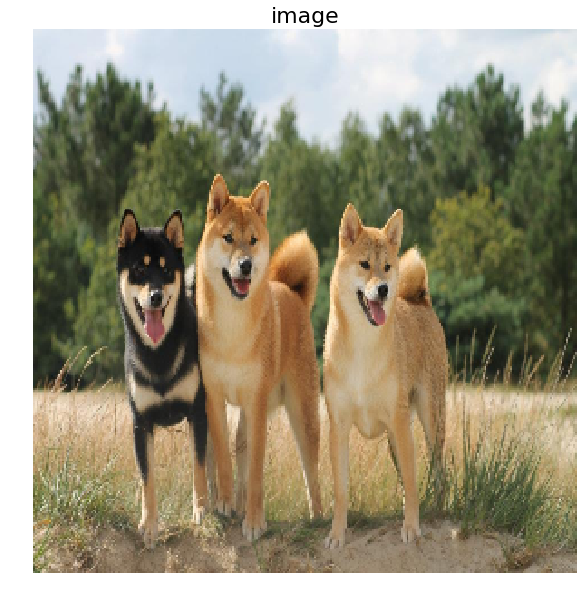

In [13]:
OpCV_Utils.show_single_image_plt(image, 'image', fig_size = (10,10), gray=True)
